# DS 2500: Data Wrangling<br>Module Assignment 2
February 15, 2022

Student: Alexander Shahramanyan<br>
Instructor: Professor Marina Kogan

## Introduction

## Questions:
- Do men and women have different phobias?
- Do the left handed people have different interests than right handed?
- Are the left handed people more creative than right handed people (more interested in arts)?

## Dataset Description:
**Dataset**: contains information on college student music and movie preferences, hobbies and interests, phobias, health habits, personality traits, views on life, and opinions, spending habits, and demographics.
<br>

*Columns*:<br>
150 columns (139 integer and 11 categorical)
- Music preferences (19 items)
- Movie preferences (12 items)
- Hobbies & interests (32 items)
- Phobias (10 items)
- Health habits (3 items)
- Personality traits, views on life, & opinions (57 items)
- Spending habits (7 items)
- Demographics (10 items)

*Number of entries (rows)*: 1010 <br><hr>

All participants were of Slovakian nationality, aged between 15-30. They rated from 1 to 5, 1 being the lowest and 5 being the highest.

## Setup

First, I import all the libraries I will need throughout the assignment, and set the plotting parameters for better visualizations.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import stats

import textwrap

# Plotting settings
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.family'] = 'serif'

Then I need to load the dataset.

In [2]:
# Load the datasets
df = pd.read_csv("responses.csv")

Next step is checking the datasets.

### Dataset Check

In [3]:
# Check dataset shape
df.shape

(1010, 150)

In [4]:
# Check the top of the data
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [5]:
# Check the bottom of the data
df.tail()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats
1009,5.0,5.0,4.0,3.0,2.0,3.0,3.0,4.0,1.0,1.0,...,21.0,185.0,72.0,1.0,male,right handed,secondary school,no,village,house/bungalow


In [6]:
# Count null values
df.isnull().sum().sort_values(ascending=False)

Height               20
Weight               20
Passive sport        15
Chemistry            10
Geography             9
                     ..
Snakes                0
Dreams                0
Internet usage        0
Eating to survive     0
Number of friends     0
Length: 150, dtype: int64

In [7]:
# Data description
df.describe(include='all')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1003.000000,990.000000,990.000000,1004.000000,1004,1007,1009,1008,1006,1006
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,6,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,female,right handed,secondary school,no,city,block of flats
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,593,906,621,754,707,595
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,20.433699,173.514141,66.405051,1.297809,NaN,NaN,NaN,NaN,NaN,NaN
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,2.828840,10.024505,13.839561,1.013348,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,15.000000,62.000000,41.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,19.000000,167.000000,55.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,20.000000,173.000000,64.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,22.000000,180.000000,75.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
fears = df.loc[:, "Flying":"Fear of public speaking"].columns.tolist()

In [9]:
gender_fears = df.melt(id_vars ="Gender", value_vars=fears, var_name="Fear", value_name="Average Score")

In [10]:
gender_fears.dropna(subset=["Gender", "Fear", "Average Score"], inplace=True)

In [11]:
gender_fears.head()

,Gender,Fear,Average Score
0,female,Flying,1.0
1,female,Flying,1.0
2,female,Flying,1.0
3,female,Flying,2.0
4,female,Flying,1.0


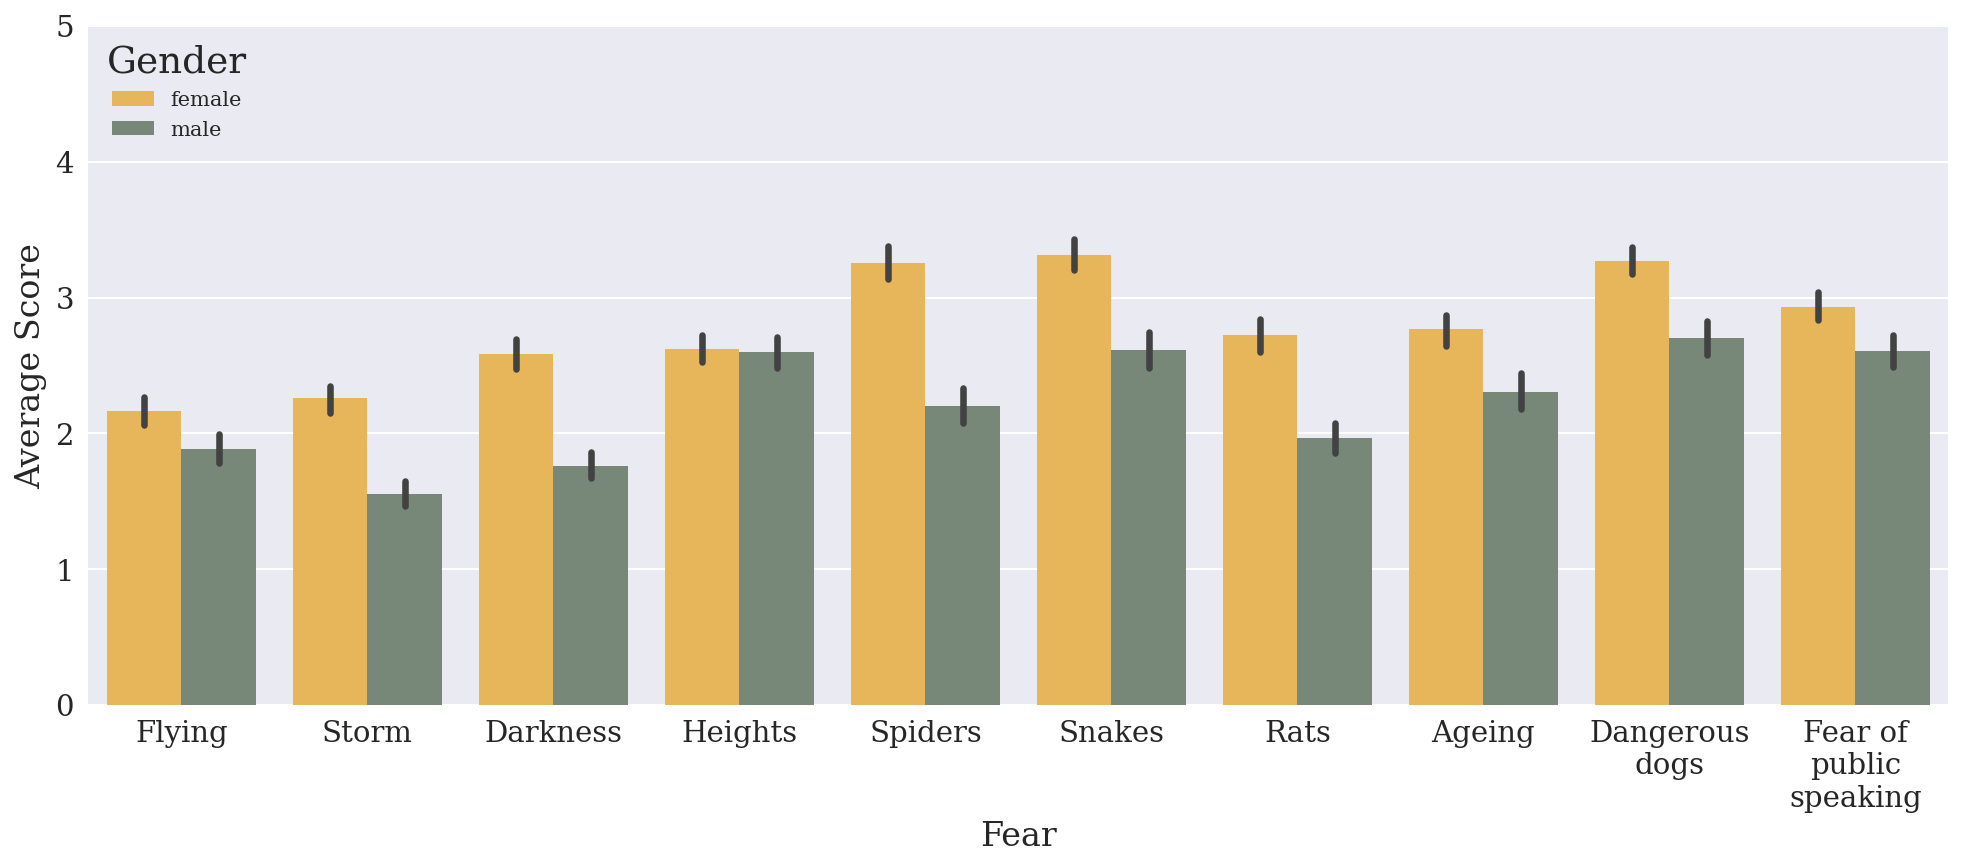

In [12]:
# Barplot for average phobia 'score' per gender
ax = sns.barplot(x="Fear", y="Average Score", hue="Gender", data=gender_fears, palette = ['#FFBC42', '#748B75'])

# Some phobia titles are too long, so, I need to wrap the title
# Get the x tick labels
ax.get_xticklabels()

# Get the text out
texts = [t.get_text()  for t in ax.get_xticklabels()]

# Wrap the text
texts = [textwrap.fill(t.get_text(), 12)  for t in ax.get_xticklabels()]

# Set the new wrapped titles
ax.set_xticklabels([textwrap.fill(t.get_text(), 12)  for t in ax.get_xticklabels()])

# Set y-axis limits
ax.set_ylim([0,5])

# Legend position
plt.legend(loc='upper left', title='Gender')

# Show the plot
plt.show()

In [13]:
interests = df.loc[:, "History":"Pets"].columns.tolist()

In [14]:
interest_groups = [interests[pos:pos+8] for pos in range(0, len(interests), 8)]

In [15]:
handedness_interests = df.melt(id_vars ="Left - right handed", value_vars=interests, var_name="Interest", value_name="Average Score")

In [16]:
handedness_interests.dropna(subset=["Left - right handed", "Interest", "Average Score"], inplace=True)

In [17]:
# Check the head of the dataframe
handedness_interests.head()

,Left - right handed,Interest,Average Score
0,right handed,History,1.0
1,right handed,History,1.0
2,right handed,History,1.0
3,right handed,History,4.0
4,right handed,History,3.0


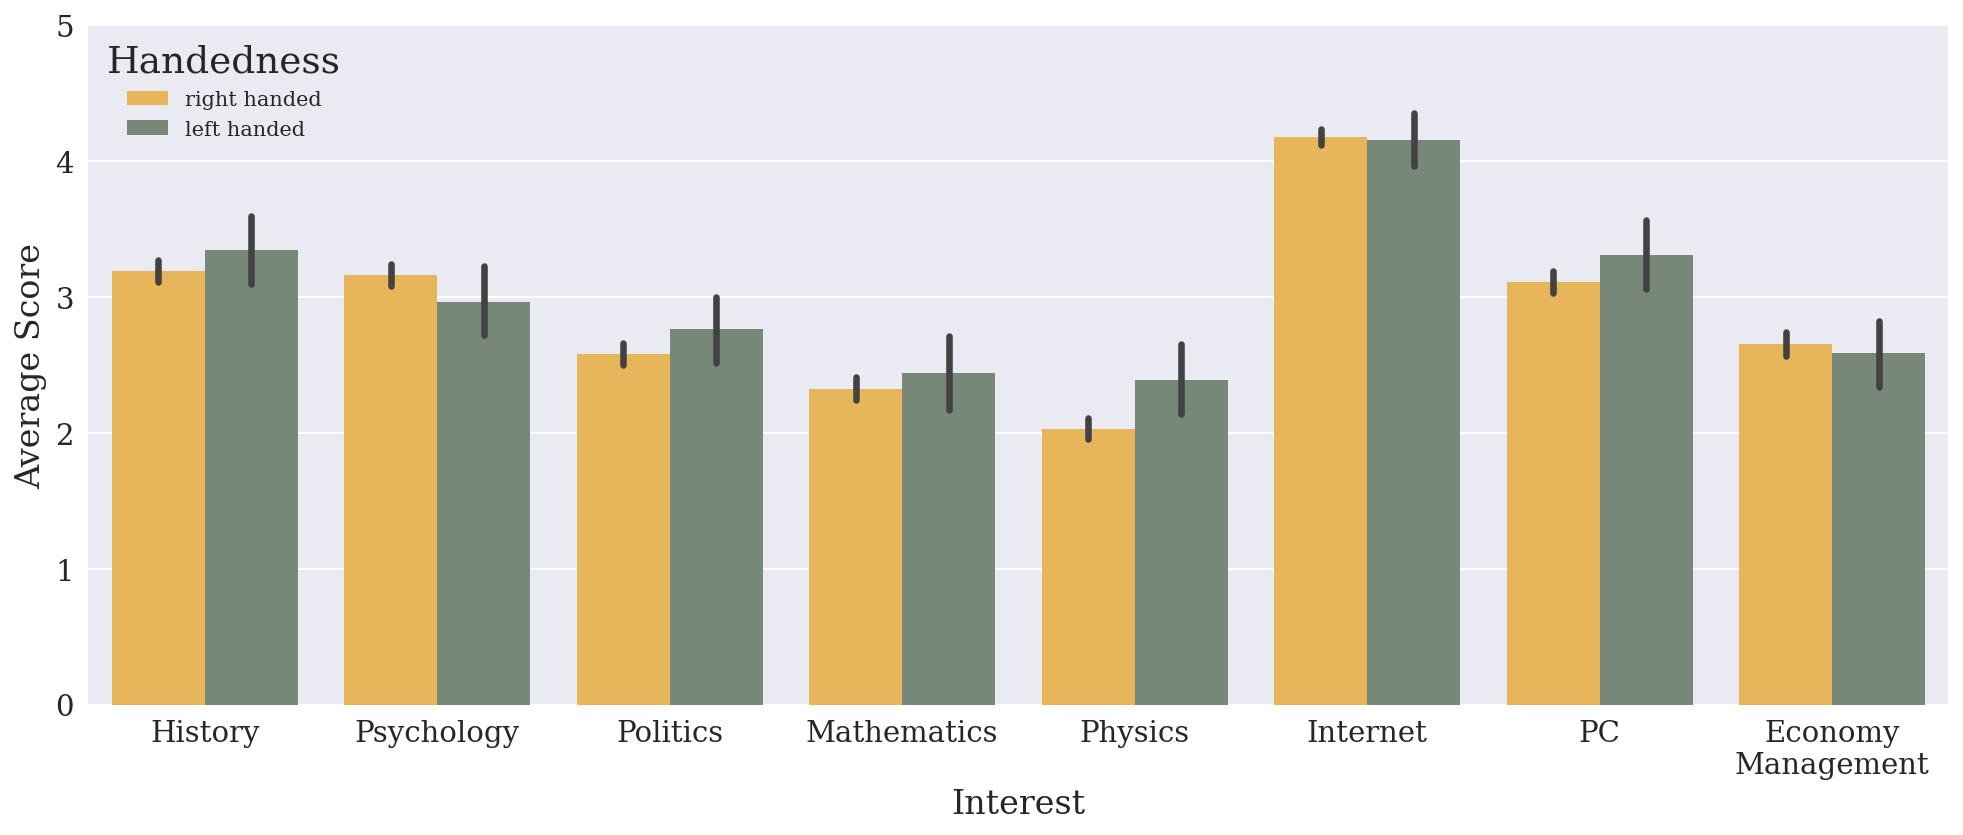

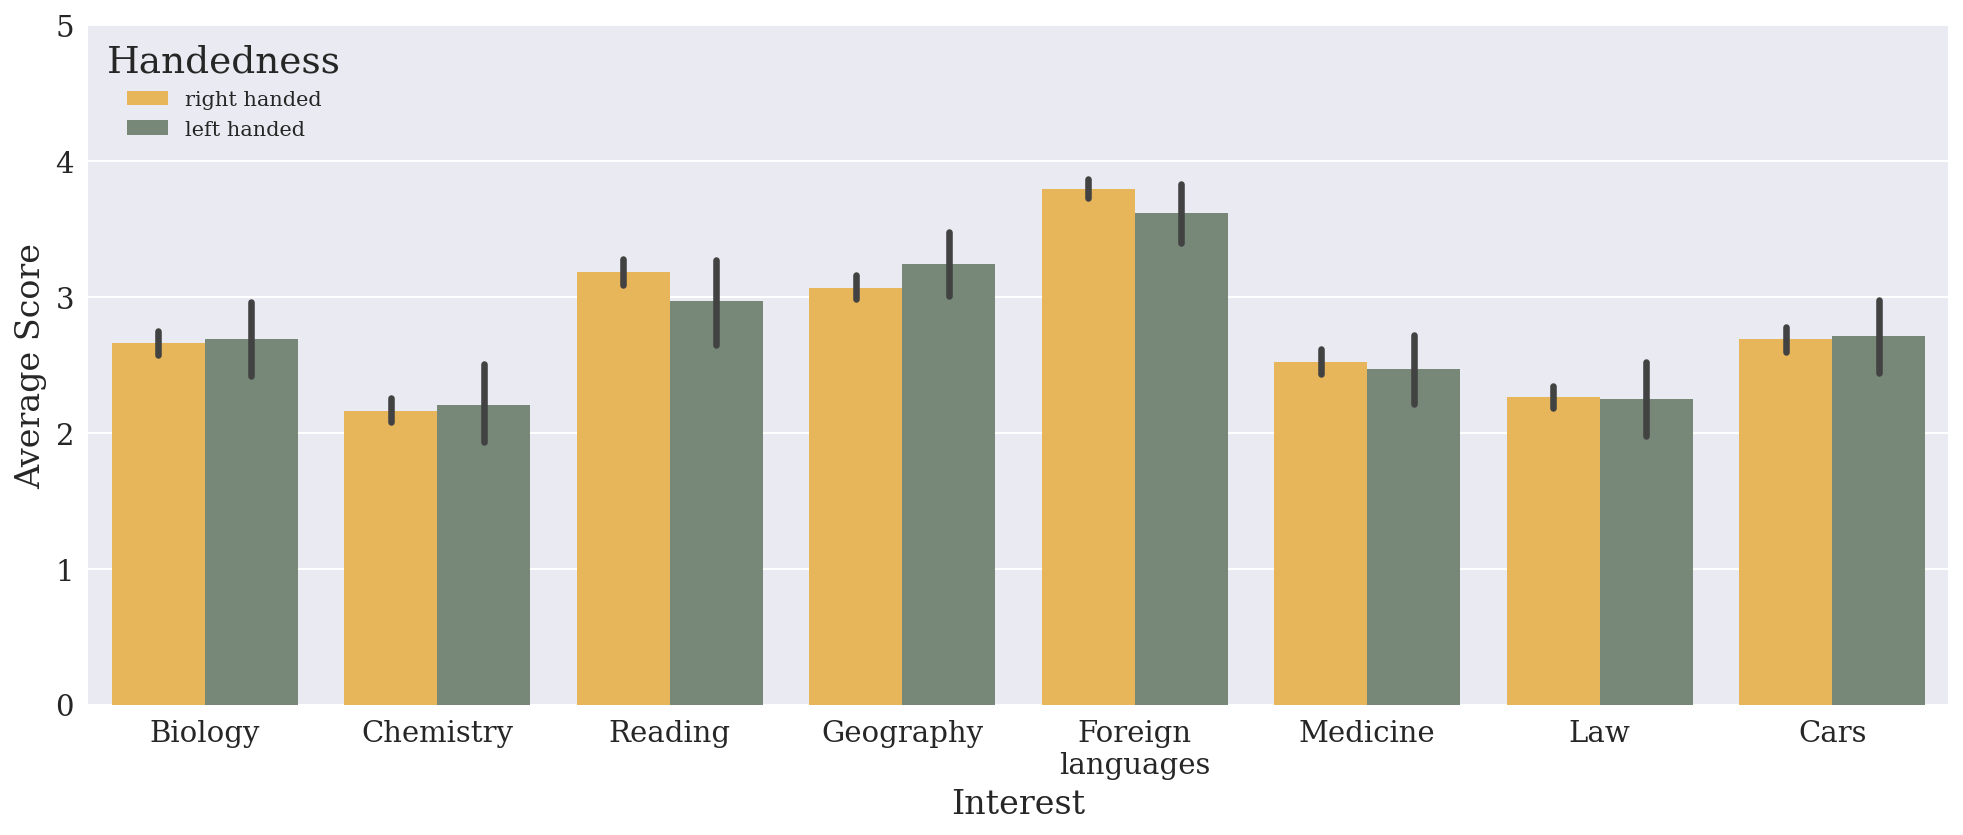

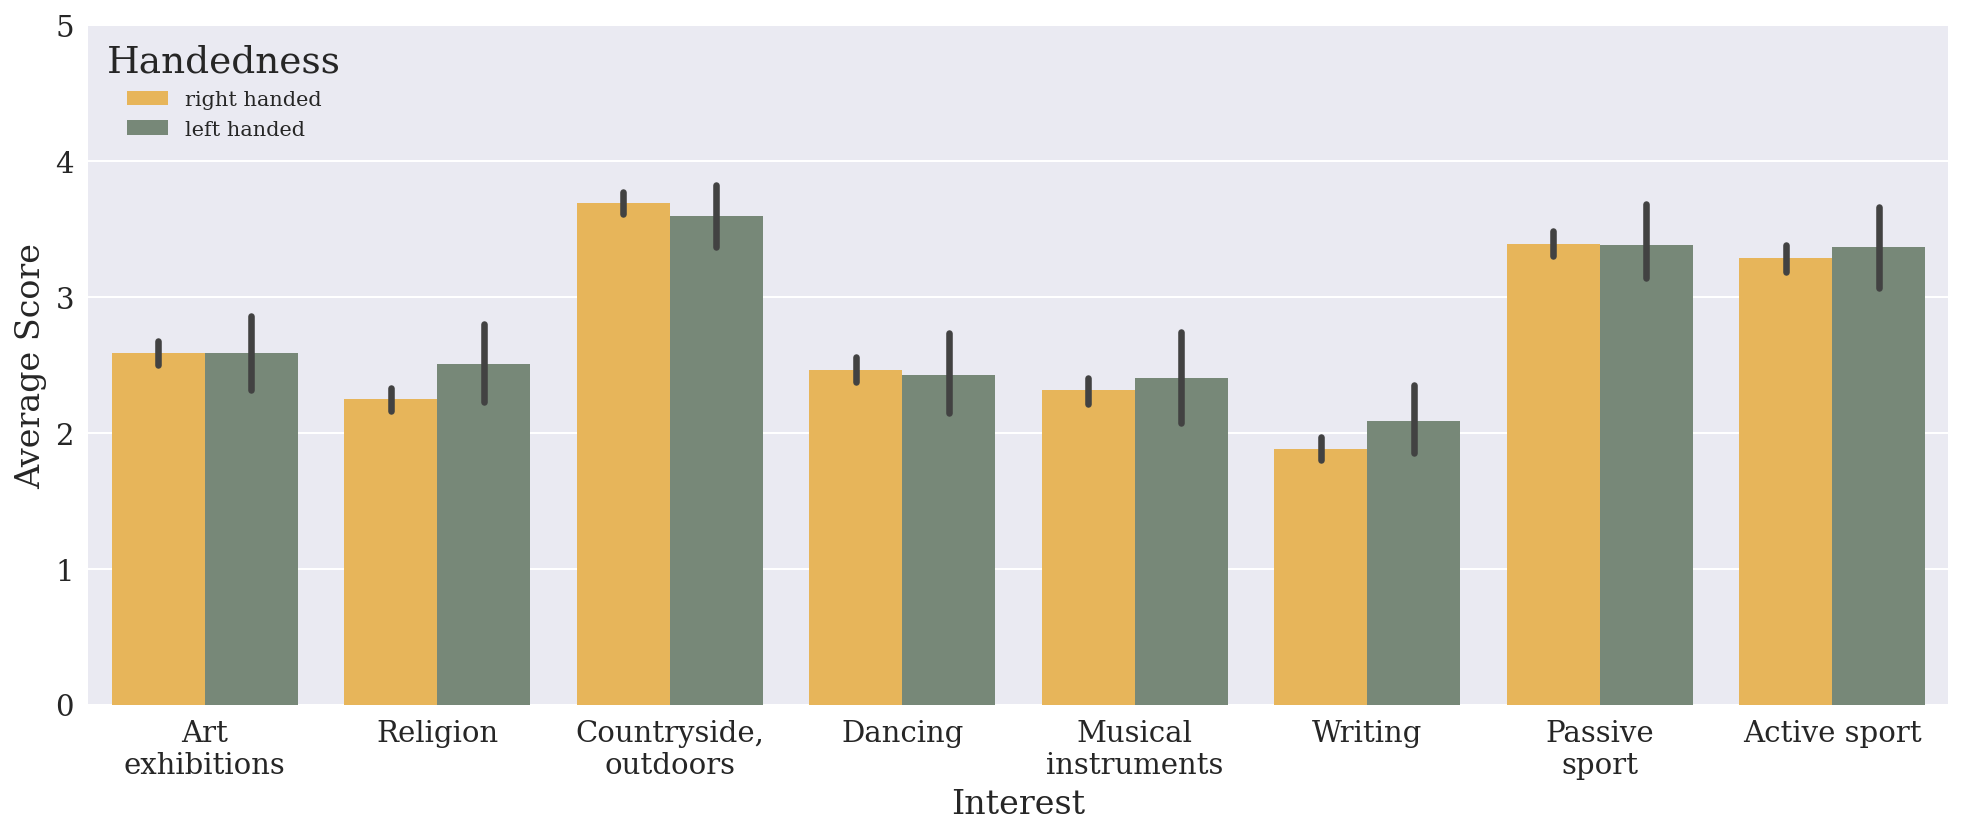

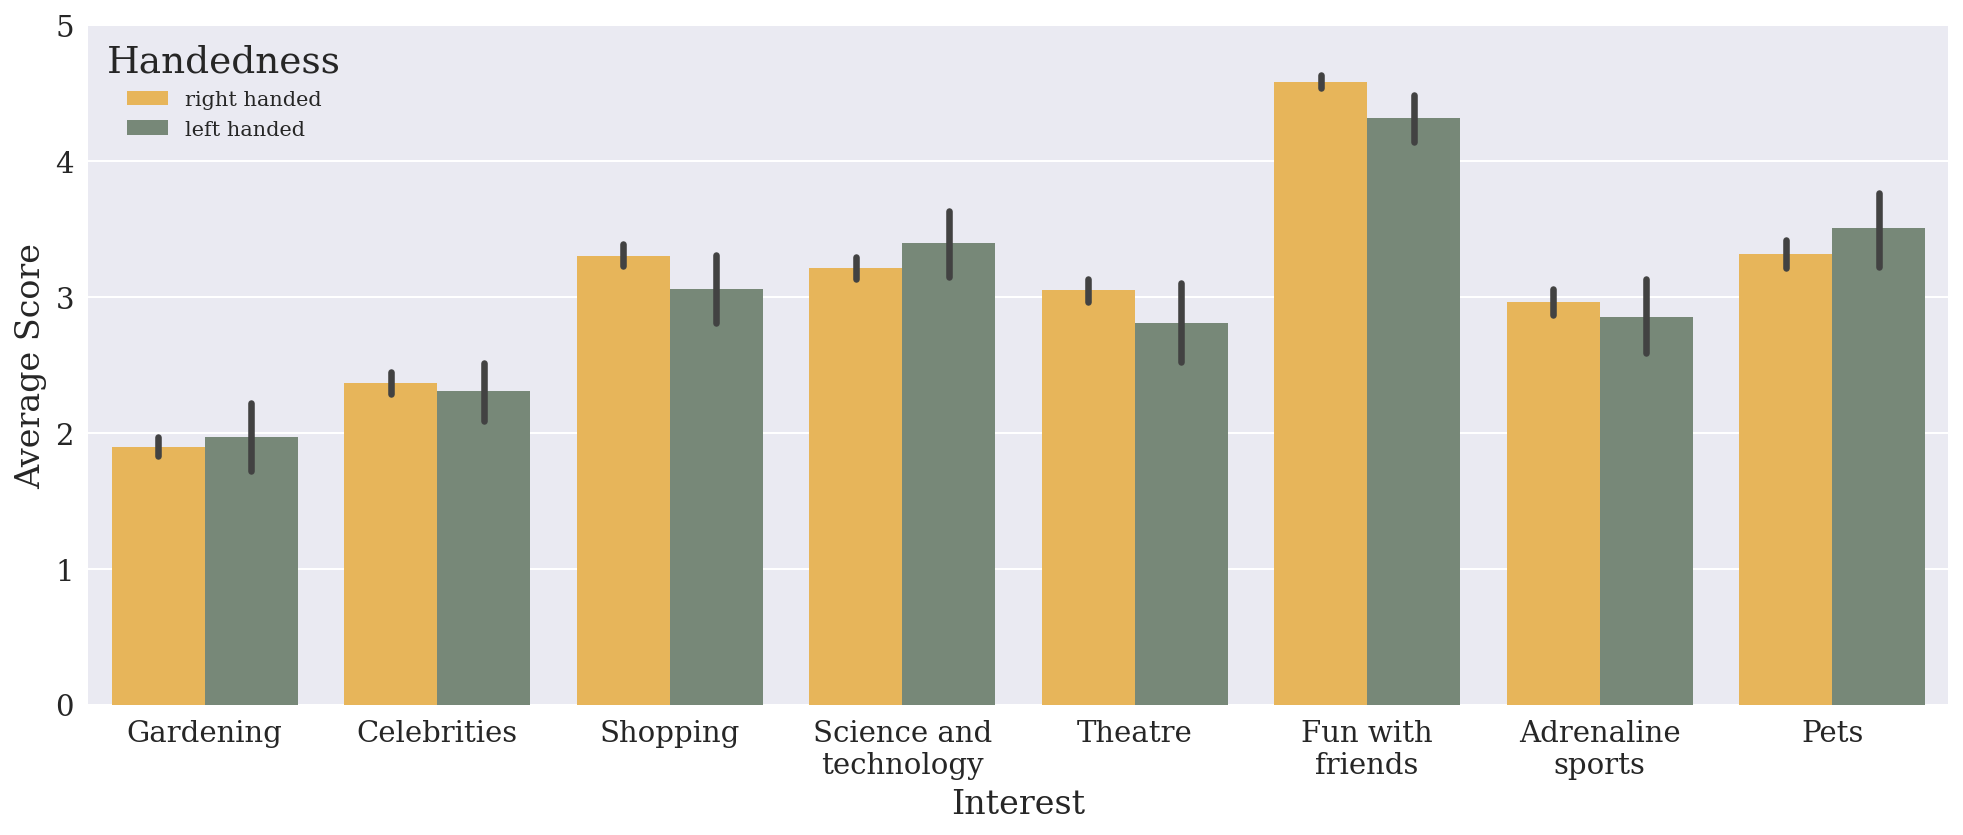

In [18]:
for cols in interest_groups:
    # Barplot for average phobia 'score' per gender
    ax = sns.barplot(x="Interest", y="Average Score", hue="Left - right handed", data=handedness_interests[handedness_interests["Interest"].isin(cols)], palette = ['#FFBC42', '#748B75'])

    # Some phobia titles are too long, so, I need to wrap the title
    # Get the x tick labels
    ax.get_xticklabels()

    # Get the text out
    texts = [t.get_text()  for t in ax.get_xticklabels()]

    # Wrap the text
    texts = [textwrap.fill(t.get_text(), 12)  for t in ax.get_xticklabels()]

    # Set the new wrapped titles
    ax.set_xticklabels([textwrap.fill(t.get_text(), 12)  for t in ax.get_xticklabels()])
    
    # Set y-axis limits
    ax.set_ylim([0,5])

    # Legend position
    plt.legend(loc='upper left', title='Handedness')
    
    # Show the plot
    plt.show()
    
    # Close the plot
    plt.close()

## Write-up